In [90]:
import pandas as pd
traindf = pd.read_csv("train.csv",encoding="utf-8")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [91]:
testdf = pd.read_csv("test.csv",encoding="utf-8")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [92]:
# 看個訓練欄位與缺失數量
# 找缺失值
# 有缺失是1，沒缺失是0
# sum是加總，即是缺失的數量
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
# 填補缺失值，有大小關係填中位數
# 通常填中位數比平均值好
# 找出資料集的中位數(數值才有)
med = traindf.median(numeric_only=True)

# pandas的東西都要設定回去
traindf = traindf.fillna(med)
traindf.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [94]:
testdf.isna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [95]:
# 為測試資料填補，不然無法使用測試資料
# 不要用測試資料的中位數，用訓練資料的
# 因為訓練資料較多，中位數較準
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [96]:
# 填訓練資料的缺失值

# 要找出出現次數最多的值填入缺失欄位
# idxmax() 可以印出最大值的索引
most = traindf["Embarked"].value_counts().idxmax()
traindf["Embarked"] = traindf["Embarked"].fillna(most)
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [97]:
dummy = pd.get_dummies(traindf["Embarked"]).astype("int64")
dummy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [98]:
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html
# 使用pd.concat連接兩個DataFrames
# 這邊把訓練資料跟OHE接在一起
# 接的方向有橫或直的，axis參數是對齊的方向
# axis=0接直的，axis=1接橫的
traindf = pd.concat([traindf,dummy],axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [99]:
dummy = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf,dummy],axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,False,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False,True
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,False,False,True


In [100]:
# 'Sex'欄位的OHE
dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf,dummy],axis=1)
dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf,dummy],axis=1)

traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,True,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,True,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1,True,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0,False,True


In [101]:
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,True,False,False,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,True,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,True,False,False,True
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,False,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,False,False,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,False,False,True,False
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False,True,False,True
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,False,False,True,False,True


處理資料時，**每當捨棄資料時，就是在降低模型準度天花板**，因為資料**細節一定會因為捨棄而遺失**。 但是文字資料一定要轉換成數值，且有些資料不知如何轉換或不明白其意義，就得處理或捨棄。 總之不要輕易捨棄資料。 也可在建完模型後，再回頭看捨棄的資料能不能重新考慮。

In [102]:
# 處理比較困難的資料(這裡看Name)
# 等等使用pd.apply()
# 取出Name欄位的稱謂
mid = "Kelly, Mr. James".split(",")[-1].split(".")[0]
mid = mid.replace(" "," ")
mid

' Mr'

In [103]:
def nameflow(s):
    mid = s.split(",")[-1].split(".")[0]
    mid = mid.replace(" ","")

    return mid
name = traindf["Name"].apply(nameflow)
name


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [104]:
print(name.value_counts())

Name
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64


In [105]:
# pd.crosstab可以幫你比對兩個欄位對應在彼此的數量
# 最後的.T是Transpose，可以翻轉行列，方便觀看
pd.crosstab(name,traindf["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [106]:
# 選擇稱謂捨棄與否
# 用字典方式達到switch case
# 字典.get(key, 若找不到回傳的值，預設None)
def select_name(s):
    d = {
        'Master' : 'Master',
        'Miss' : 'Miss',
        'Mr' : 'Mr',
        'Mrs' : 'Mrs'
    }
    return d.get(s)
name = name.apply(select_name)
name.isna().sum()

np.int64(27)

In [107]:
# 將處理過的稱謂做成OHE，再拼接到訓練資料
name = traindf["Name"].apply(nameflow).apply(select_name)
dummy = pd.get_dummies(name)
traindf = pd.concat([traindf,dummy],axis=1)
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,0,0,1,False,True,False,False,True,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,1,0,0,True,False,False,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,0,0,1,True,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,0,0,1,True,False,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,0,0,1,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,S,0,0,1,False,True,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,S,0,0,1,True,False,False,True,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,S,0,0,1,True,False,False,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,C,1,0,0,False,True,False,False,True,False


In [108]:
# 將處理過的稱謂做成OHE，再拼接到測試資料
name = testdf["Name"].apply(nameflow).apply(select_name)
dummy = pd.get_dummies(name)
testdf = pd.concat([testdf,dummy],axis=1)
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,True,False,False,True,False,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False,False,True,True,False,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,True,False,False,True,False,False,True,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,False,True,False,True,False,False,True,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,False,False,True,False,True,False,False,True,False
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,False,False,True,False,False,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,False,True,False,True,False,False,True,False
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,False,False,True,False,True,False,False,True,False


#### 複習
##### 資料預處理步驟:
##### 1. 補缺失值
##### 2. OHE(把類別轉換成數字但又不要有大小關係)
##### 3. 複雜的處理可以用pd.apply自己寫function

In [109]:
# 做好OHE後，把不需要的欄位丟掉
# 看有哪些欄位，再決定要丟哪些欄位
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Mrs'],
      dtype='object')

In [110]:
# 將不要的欄位丟掉
# 將無法處理或做過OHE的欄位丟掉
traindf = traindf.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
traindf

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,0,3,22.0,1,0,7.2500,0,0,1,False,True,False,False,True,False
1,1,1,38.0,1,0,71.2833,1,0,0,True,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,0,0,1,True,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,0,0,1,True,False,False,False,False,True
4,0,3,35.0,0,0,8.0500,0,0,1,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0,1,False,True,False,False,False,False
887,1,1,19.0,0,0,30.0000,0,0,1,True,False,False,True,False,False
888,0,3,28.0,1,2,23.4500,0,0,1,True,False,False,True,False,False
889,1,1,26.0,0,0,30.0000,1,0,0,False,True,False,False,True,False


In [111]:
testdf

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,False,True,False,False,True,False,False,True,False
1,893,3,47.0,1,0,7.0000,False,False,True,True,False,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,True,False,False,True,False,False,True,False
3,895,3,27.0,0,0,8.6625,False,False,True,False,True,False,False,True,False
4,896,3,22.0,1,1,12.2875,False,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,False,False,True,False,True,False,False,True,False
414,1306,1,39.0,0,0,108.9000,True,False,False,True,False,False,False,False,False
415,1307,3,38.5,0,0,7.2500,False,False,True,False,True,False,False,True,False
416,1308,3,28.0,0,0,8.0500,False,False,True,False,True,False,False,True,False


In [112]:
# 處理前後差別:
# 處理完後，所有資料都變成數值，原本是文字的資料也轉成OHE了，因為函式庫只能用數字
# traindf跟testdf欄位有些差別
# train沒有PassengerId，test有，因為這特徵訓練沒用，但測試需要此特徵填答案。
# train有Survived，test沒有，因為這是答案。

In [113]:
# 畫圖看相關係數
# 1: 完全正相關(有用)
# 0: 不相關(無用特徵)
# -1: 完全負相關(有用)
traindf.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351,0.085221,0.327093,-0.549199,0.339040
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900,0.082081,-0.000576,0.142698,-0.149209
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.081163,0.081163,-0.373960,-0.247483,0.180808,0.169578
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631,0.349559,0.087932,-0.250489,0.063407
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489,0.267344,0.105567,-0.333905,0.225852
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333,0.010908,0.118271,-0.183766,0.105203
C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853,-0.035225,0.026215,-0.072567,0.061395
Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115,0.010478,0.171117,-0.078338,-0.089739
S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224,0.024264,-0.130650,0.112870,0.002689
female,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224,1.000000,-1.000000,-0.159934,0.686808,-0.867334,0.547600


<Axes: >

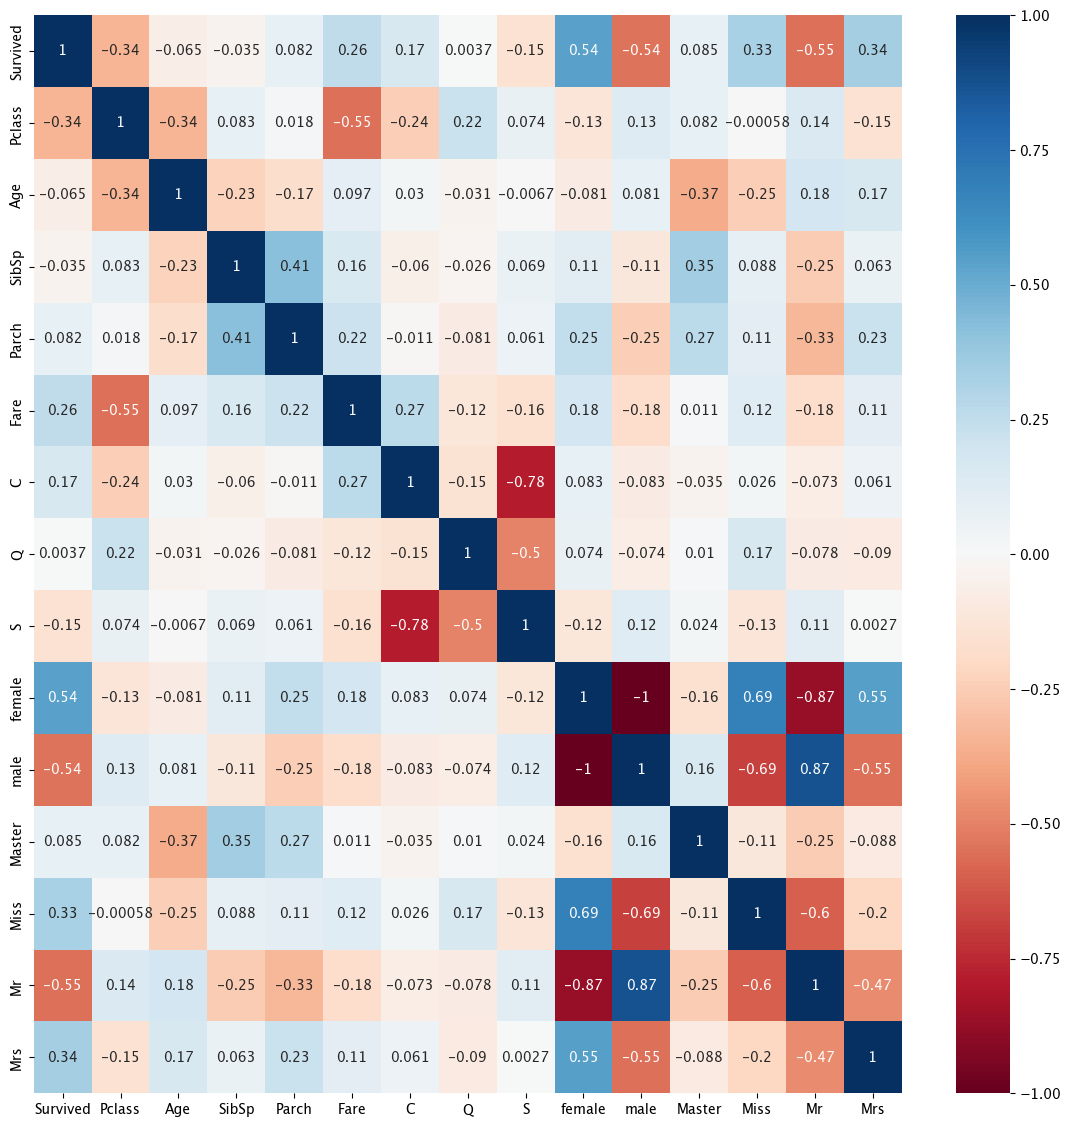

In [114]:
# 畫出相關係數圖
# seaborn是基於matplotlib的進階函式庫
import matplotlib.pyplot as plt
import seaborn as sns
# %是Magic Command，只能在notebook使用
# 這行可以讓圖自動plt.show()
%matplotlib inline
# 調整圖像大小
plt.figure(figsize=(14, 14))

# annot可決定是否在圖中印出數值
# cmap顏色代碼可在下列網址尋找
# https://matplotlib.org/stable/tutorials/colors/colormaps.html#lightness-of-matplotlib-colormaps
sns.heatmap(traindf.corr(), annot=True, cmap='RdBu')

In [115]:
# 用隨機森林演算法(Random Forest)
# 用很多棵決策樹"平行"組合投票選出結果(ensemble)
# 每棵樹在train_test_split時的分法都"略有不同"
from sklearn.ensemble import RandomForestClassifier

# 交叉驗證(Cross Validation)
# 假設9/1切train_test_split
# 每次拿其中1份驗證，共驗證10次。
from sklearn.model_selection import cross_val_score
# numpy > 處理大量數字
import numpy as np

# 把訓練資料的答案丟掉
trainx = traindf.drop(['Survived'], axis=1)
# 將答案當作目標資料
trainy = traindf['Survived']

# n_estimators -> 你要有幾棵樹
clf = RandomForestClassifier(max_depth=8, n_estimators=50)

# cv參數決定切幾份(這裡切10份) 
# 用np.average取其平均
np.average(cross_val_score(clf, trainx, trainy, cv=10))

np.float64(0.8316853932584269)

In [ ]:
# 貪婪搜索參數.                      
# 找max_depth與n_estimators
from sklearn.model_selection import GridSearchCV
p = {
#   深度的搜索範圍(5~10)
    'max_depth':list(range(5, 11)),
#   棵數的搜索範圍(20~30)
    'n_estimators':list(range(20, 31))
}
clf = RandomForestClassifier()
s = GridSearchCV(clf, p, cv=5)
s.fit(trainx, trainy)
# best_params_L: 最好的參數
# best_score_: 最好的分數
print(s.best_params_)
print(s.best_score_)
# 骰幾次看哪組參數好
# 7和27也不錯
# 決策樹憑運氣

{'max_depth': 9, 'n_estimators': 21}
0.8383968363567886


In [117]:
# 算出答案

# 把旅客ID取出
testx = testdf.drop(['PassengerId'], axis=1)
# 存下旅客ID
testid = testdf['PassengerId']
# 設定隨機森林參數
clf = RandomForestClassifier(max_depth=7, n_estimators=24)
# 將訓練資料放入隨機森林運算
clf.fit(trainx, trainy)
# 利用訓練好的模型預測測試資料
pre = clf.predict(testx)
# 將計算結果存下，並輸出成csv檔
result = pd.DataFrame()
result['PassengerId'] = testid
result['Survived'] = pre
result.to_csv('result.csv', encoding='utf-8', index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [118]:
# 看每個特徵的重要程度，類似相關係數圖
# 也可以畫決策樹來看
clf.feature_importances_

array([0.13787671, 0.10221578, 0.04467278, 0.02935747, 0.1438264 ,
       0.01414948, 0.0068603 , 0.01753304, 0.12064748, 0.10413319,
       0.0213686 , 0.04935603, 0.15287121, 0.05513154])

In [119]:
# 欄位對照上面的數字
trainx.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Mrs'],
      dtype='object')

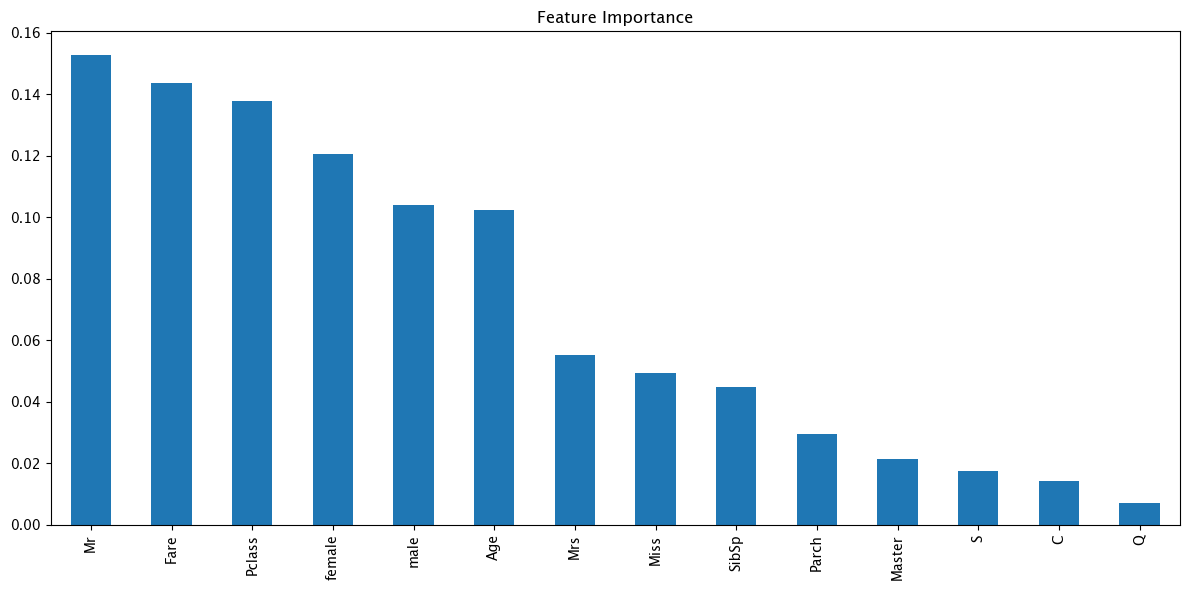

In [120]:
feat_importance = pd.Series(clf.feature_importances_, index=trainx.columns)
feat_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
